<a href="https://colab.research.google.com/github/MiguelAngel-ht/Machine_Learning_Algorithms-2021/blob/main/02-K-Means-Classifier/CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

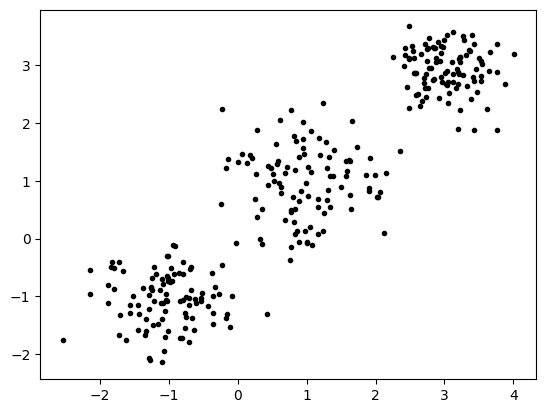

In [44]:
#   MIGUEL ANGEL HERNANDEZ TAPIA
#   K-MEANS IMPLEMENTATION

# Importing libraries
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(7)  # Setting the random seed for reproducibility

# Creating three different clusters of data points
x1 = np.random.standard_normal((100,2))*0.6+np.ones((100,2))
x2 = np.random.standard_normal((100,2))*0.5-np.ones((100,2))
x3 = np.random.standard_normal((100,2))*0.4-2*np.ones((100,2))+5

# Combining all the clusters into one dataset
X = np.concatenate((x1,x2,x3),axis=0)

# Display plot
plt.plot(X[:,0],X[:,1],'k.')
plt.show()


In [45]:
# Auxiliar functions

# To calculate euclidean distance
def distance(point1, point2):
    return ((point1[0] - point2[0])**2 + (point1[1] - point2[1]) ** 2) ** 0.5

# Mean point between 2 points
def mean(points):
    total_x = sum(point[0] for point in points)
    total_y = sum(point[1] for point in points)
    return [total_x / len(points), total_y / len(points)]


In [46]:
def kmeans(X, k=2, iter=50):
    # Generate initial random centroids
    C = [[np.random.uniform(-2, 4), np.random.uniform(-2, 4)] for _ in range(k)]

    # Loop for the number of iterations
    for _ in range(iter):
        clusters = [[] for _ in range(k)]  # Initialize clusters

        # Assign each data point to the nearest centroid
        for y in X:
            distances = [distance(y, centroid) for centroid in C]
            cluster_index = distances.index(min(distances))
            clusters[cluster_index].append(y)

        # Recalculate the centroids as the mean of all points in the cluster
        for i, cluster in enumerate(clusters):
            if cluster:  # if the cluster contains points
                C[i] = mean(cluster)

    # Visualization
    colors = ['limegreen', 'cornflowerblue', 'gold', 'slateblue', 'orchid']
    for i, cluster in enumerate(clusters):
        if cluster:  # if the cluster contains points
            px, py = zip(*cluster)
            plt.scatter(px, py, c=colors[i % len(colors)], alpha=0.5)  # Plot points with semi-transparency

    # Plot the final centroids with a distinct marker
    CX, CY = zip(*C)
    plt.scatter(CX, CY, c='firebrick', marker='*', s=200, edgecolors='white')
    plt.show()

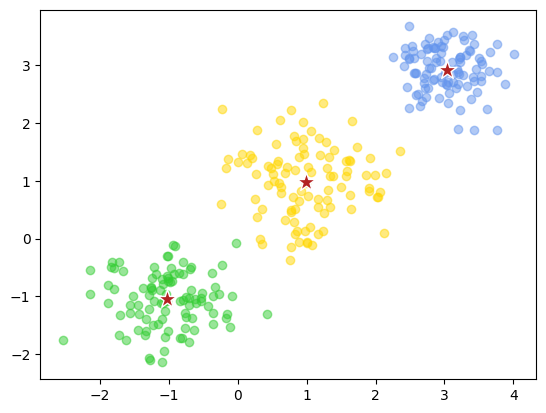

In [61]:
kmeans(X, k=3, iter=50)